<a href="https://colab.research.google.com/github/HwangSiyeon/ESAA_homework/blob/main/ESAA_12_01_%ED%8F%89%EA%B7%A0%EC%9D%B4%EB%8F%99%2CGMM_MachineLearningGuide(p_427_440).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 평균이동

### 평균이동의 개요

- 평균 이동은 K-평균과 유사하게 중심을 군집의 중심으로 지속적으로 움직이면서 군집화를 수행한다
- 하지만 K 평균이 중심에 소속된 데이터의 평균 거리 중심으로 이동하는 데 반해, 평균 이동은 **중심을 데이터가 모여 있는 밀도가 가장 높은 곳으로 이동**시킴

- **군집 중심점**: 평균 이동 군집화는 데이터의 분포도를 이용해 군집 중심점을 찾음. 군집 중심점은 데이터 포인트가 모여있는 곳이라는 생각에서 착안한 것이며 이를 위해 확률 밀도 함수를 이용한 가장 집중적으로 데이터가 모여있어 확률 밀도 함수가 피크인 점을 이용한다. 군집 중심점으로 선정하며 일반적으로 주어진 모델의 확률 밀도 함수를 찾기 위해서 KDE(Kernel Density Estimation)을 이용.
- **평균 이동 군집화** : 특정 데이터를 반경 내의 데이터 분포 확률 밀도가 가장 높은 곳으로 이동하기 위해 주변 데이터와의 거리 값을 KDE 함수 값으로 입력한 뒤 그 반환 값을 현재 위치에서 업데이트하면서 이동하는 방식. 이러한 방식을 전체 데이터에 반복적으로 적용하면서 데이터의 군집중심점을 찾아낸다


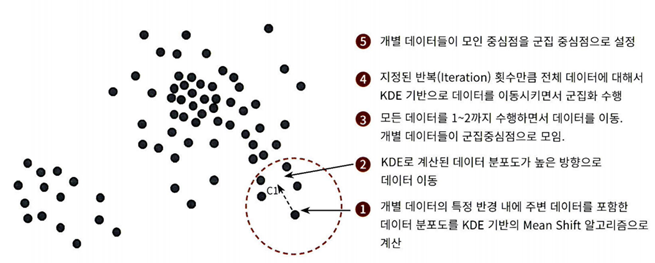

- **KDE(Kernel Density Estimation)**: 커널 함수를 통해 어떤 변수의 확률밀도함수를 추정하는 대표적인 방법. 개별 관측 데이터에 커널 함수를 적용한 뒤 이 적용값을 모두 더한 후 개별 관측 데이터의 수로 나누어 확률밀도함수를 추정.
- 대표적인 커널함수: 가우시안 분포 함수

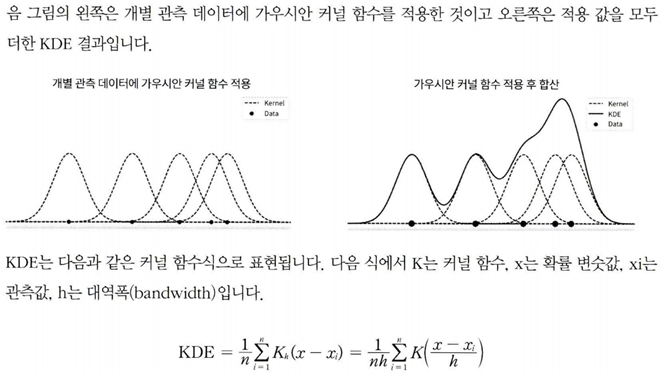

- 대역폭 h : KDE형태를 부드러운 형태로 평활화하는데 적용. 확률밀도추정 성능 좌우
> 작은 h값(h=1) :  좁고 뾰족한 KDE. 변동성이 큰 방식으로 확률밀도함수 추정, 과적합되기 쉬움
> 큰 h(h=10)값: 과도하게 평활화된 KDE. 지나차개 단순화된 방식으로 확률밀도함수 추정. 과소적합되기 쉬음


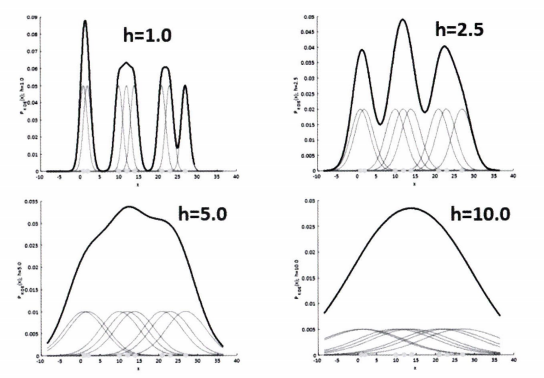





- 일반적으로 평균이동군집화는 대역폭이 클수록 평활화된 KDE로 인해 적은 수의 군집 중심점을 가지며 대역폭이 적을수록 많은 수의 군집 중심점을 가진다.
- 평균 군집화는 군지의 개수 지정X. 오직 대역폭의 크기에 따라 군집화 수행.
- 사이킷런은 평균이동 군집화를 위해 MeanShift클래스를 제공. bandwidth 파라미터는 h와 동일

In [2]:
# make_blobs()의 cluster_std를 0.7으로 정한 3개 군집의 데이터에 대해 bandwidth를 0.8로 설정한 평균이동군집화 알고리즘
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X,y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

meanshift = MeanShift(bandwidth=0.8)
cluster_labels=meanshift.fit_predict(X)
print("cluster labels 유형:", np.unique(cluster_labels))

cluster labels 유형: [0 1 2 3 4 5]


- 6개의 군집으로 분류 => 지나치게 세분화
- bandwidth가 작을수록 군집개수 증가

In [16]:
# bandwidth를 1으로 증가 후 Meanshift 수행
meanshift = MeanShift(bandwidth=1)
cluster_labels = meanshift.fit_predict(X)
print("cluster labels 유형", np.unique(cluster_labels))

cluster labels 유형 [0 1 2]


- 3개의 군집으로 잘 군집화됨
- 최적화값의 bandwidth를 찾기 위해 estimate_bandwidth()를 사용

In [4]:
# 최적화값의 bandwidth를 찾기 위해 estimate_bandwidth()를 사용
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(X)
print("bandwidth 값:", round(bandwidth,3))

bandwidth 값: 1.816


In [5]:
# 최적화된 bandwidth를 평균이동값으로 적용 후 군집화
mport pandas as pd

clusterDF = pd.DataFrame(data=X, columns=["ftr1", "ftr2"])
clusterDF["target"] = y

#estimate_bandwidth()로 최적의 bandwidth 계산
best_bandwidth = estimate_bandwidth(X)

meanshift=MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print("cluster labels 유형:", np.unique(cluster_labels))

cluster labels 유형: [0 1 2]


- 3개의 군집 => 맞게 적합됨
- 평균이동도 k-means와 유사하게 중심을 가지고 있으므로 cluster_centers_속성으로 군집중심좌표 표시 가능

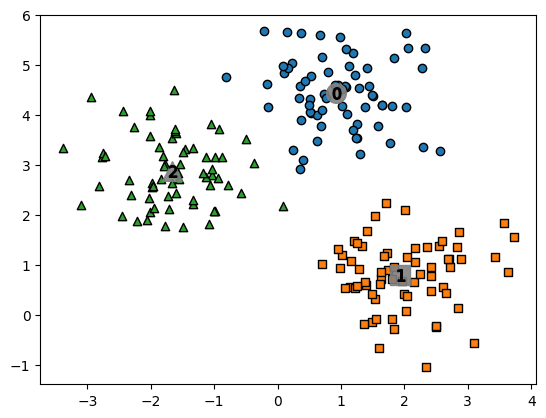

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

clusterDF["meanshift_label"] = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers = ["o","s","^","x","*"]

for label in unique_labels:
    label_cluster = clusterDF[clusterDF["meanshift_label"]==label]
    center_x_y = centers[label]
    # 군집별로 다른 마커로 산점도 적용
    plt.scatter(x=label_cluster["ftr1"], y=label_cluster["ftr2"], edgecolor="k", marker=markers[label])
    #군집별 중심 표현
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color="gray", alpha=0.9,marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color="k", edgecolor="k", marker="$%d$" % label)

plt.show()

In [7]:
print(clusterDF.groupby("target")["meanshift_label"].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64


- Target값과 label값이 1:1로 잘 매칭됨
- 평균이동의 장점: 데이터셋의 형태를 특정 형태로 가정하거나, 특정 분포도 기반의 모델로 가정하지 않기 떄문에 좀 더 유연한 군집화가 가능하다. 이상치의 영향력도 크지 않으며 미리 군집의 개수를 정할 필요 X.
- 평균이동의 단점: 알고리즘 수행 시간이 오래 걸린다. bandwidth에 따른 군집화 영향도가 매우 크다

# GMM(Gausian Mixture Model)

### GMM모델 소개
- GMM 군집화는 군집화를 적용하고자 하는 데이터가 여러 개의 가우시안 분포를 가진 데이터 집합들이 섞여서 생성된 것이라는 가정하에 군집화를 수행하는 방식
- GMM은 데이터를 여러 개의 가우시안 분포가 섞인 것으로 간주 => 섞인 데이터 분포에서 개별 유형의 가우시안 분포를 추출


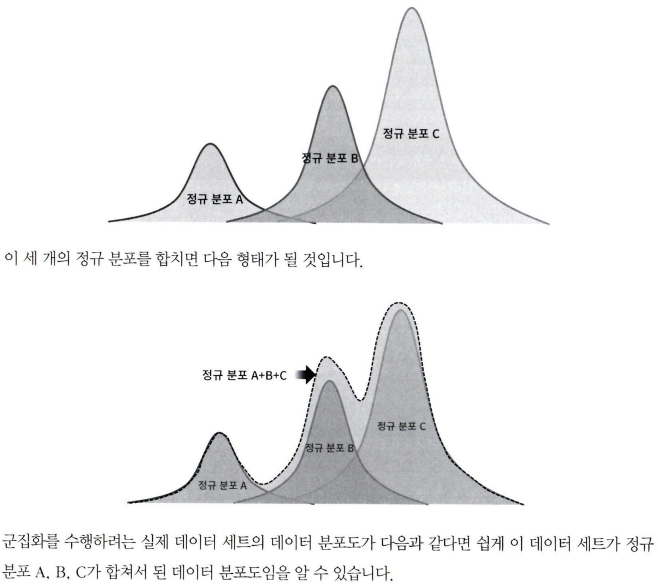


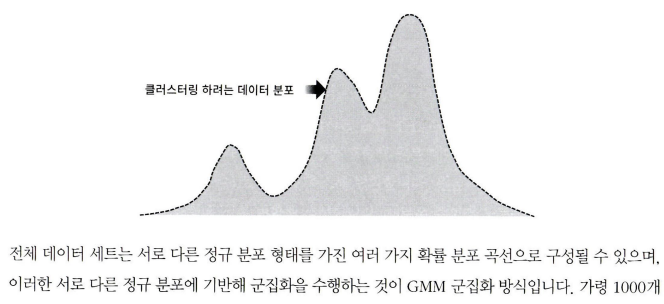


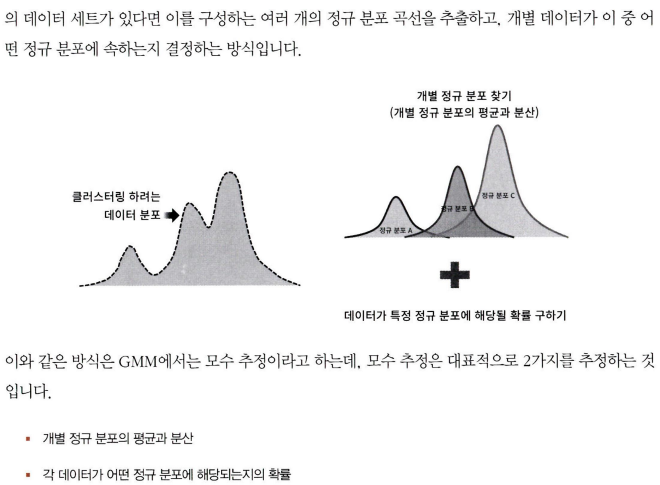

- 이러한 모수 추정을 위해 GMM은 EM(Expectation and Maximation)방범을 적용한다. 사이킷런은 GMM의 EM방식을 통한 모수 추정 군집화를 지원하기 위해 Gausian mixture클래스를 지원한다.

### GMM을 이용한 붓꽃 데이터셋 군집화
- GMM은 확률기반군집화이고 K-means는 거리기반군집화이다.

In [8]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]

# 좀 더 편리한 데이터 handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
irisDF["target"] = iris.target

- GausianMixture 객체의 가장 중요한 초기화 파라미터는 n_components이다. n_components는 GausianMixture의 모델의 총개수이다. 이는 k-means의 n_cluster와 같이 군집의 개수를 정하는데 중요한 역할을 한다.

In [9]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3, random_state=0).fit(iris.data)
gmm_cluster_labels = gmm.predict(iris.data)

# 군집화 결과를 irisDF의 "gmm_cluster" 칼럼명으로 저장
irisDF["gmm_cluster"]=gmm_cluster_labels
irisDF["target"]=iris.target

# target 값에 따라 gmm_cluster 값이 어떻게 매핑됐는지 확인
iris_result = irisDF.groupby(["target"])["gmm_cluster"].value_counts()
print(iris_result)

target  gmm_cluster
0       0              50
1       2              45
        1               5
2       1              50
Name: gmm_cluster, dtype: int64


- Target0은 cluster0으로, Target2는 cluster1로 잘 매핑되었다. k-means보다 더 효과적으로 분류됨을 확인할 수 있다.

In [10]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=0).fit(iris.data)
kmeans_cluster_labels = kmeans.predict(iris.data)
irisDF["kmeans_cluster"]=kmeans_cluster_labels
iris_result=irisDF.groupby(["target"])["kmeans_cluster"].value_counts()
print(iris_result)

target  kmeans_cluster
0       1                 50
1       0                 48
        2                  2
2       2                 36
        0                 14
Name: kmeans_cluster, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


- 이는 어떤 알고리즘이 더 뛰어나다는 의미가 아니라 이 데이터에는 GMM이 더 효과적임을 의미한다.
- k-means는 평균거리중심으로 중심을 이동하면서 군집화를 수행하는 방식이므로 개별 군집 내의 데이터가 원형으로 흩어져 있는 경우에 매우 효과적으로 군집화가 수행될 수 있다.

### GMM과 k-means의 비교
- kmeans는 원형의 범위에서 군집화를 수행한다. 데이터셋이 원형의 범위를 가질수록 kmeans의 군집화 효율은 더욱 높아진다.

- 다음은 make_blobs()의 군집의 수를 3개로 하되, cluster_std를 0.5로 설정해 군집 내의 데이터를 뭉치게 유도한 데이터셋에 kmeans를 적용한 결과이다. 이렇게 cluster_std를 작게 설정하면 데이터가 원형 형태로 분산될 수 있다.

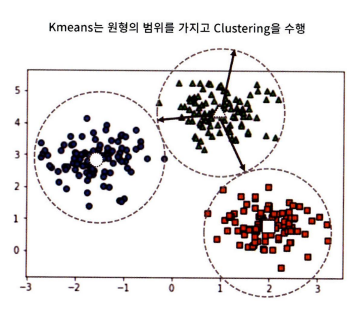


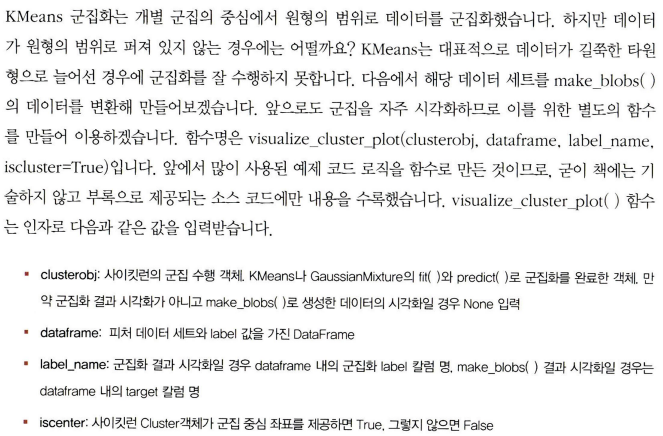

In [11]:
def visualize_cluster_plot(clusterobj, dataframe, label_name, iscenter=True):

    # 군집별 중심 위치: K-Means, Mean Shift 등
    if iscenter:
        centers = clusterobj.cluster_centers_

    # Cluster 값 종류
    unique_labels = np.unique(dataframe[label_name].values)

    markers=['o', 's', '^', 'x', '*']
    isNoise=False

    for label in unique_labels:
        # 군집별 데이터 프레임
        label_cluster = dataframe[dataframe[label_name]==label]

        if label == -1:
            cluster_legend = 'Noise'
            isNoise=True
        else:
            cluster_legend = 'Cluster '+str(label)

        # 각 군집 시각화
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], s=70,
                    edgecolor='k', marker=markers[label], label=cluster_legend)

        # 군집별 중심 위치 시각화
        if iscenter:
            center_x_y = centers[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=250, color='white',
                        alpha=0.9, edgecolor='k', marker=markers[label])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k',\
                        edgecolor='k', marker='$%d$' % label)

    if isNoise:
        legend_loc='upper center'
    else:
        legend_loc='upper right'

    plt.legend(loc=legend_loc)
    plt.show()

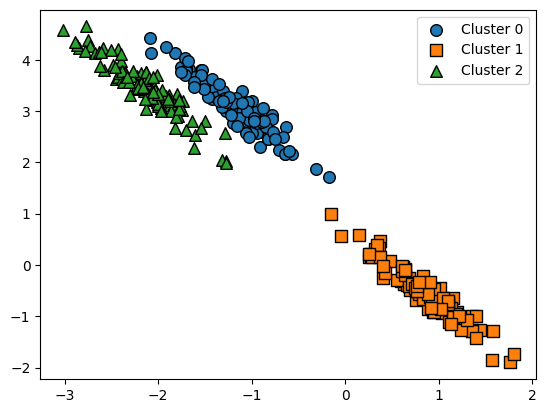

In [12]:
from sklearn.datasets import make_blobs

# make_blobs()로 300개의 데이터 세트, 3개의 군집 세트, cluster_std=0.5를 만듦
X,y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

#길게 늘어난 타원형의 데이터 세트를 생성하기 위해 변환함.
transformation = [[0.60834549, -0.63667341],[-0.40887718,0.85253229]]
X_aniso = np.dot(X,transformation)

#feature 데이터 세트와 make_blobs()의 y 결괏값을 DataFrame으로 저장
clusterDF = pd.DataFrame(data=X_aniso, columns=["ftr1","ftr2"])
clusterDF["target"] = y

#생성된 데이터 세트를 target별로 다른 마커로 표시해 시각화함
visualize_cluster_plot(None, clusterDF, "target", iscenter=False)

- 위와 같이 만들어진 데이터셋에서는 kmeans군집화 정확성이 떨어지게 된다.kmeans가 위 데이터셋을 어떻게 군집화하는지 확인해보자

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


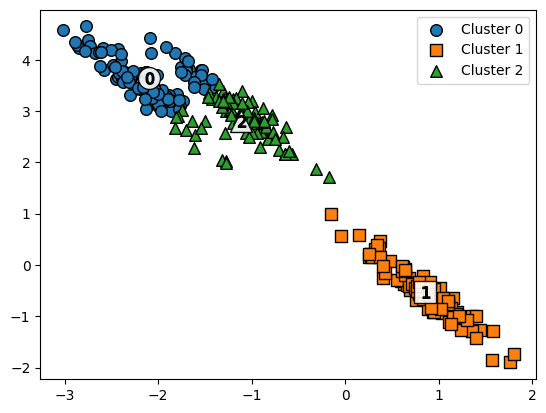

In [13]:
# 3개의 군집 기반 Kmeans를 X_aniso 데이터 세트에 적용
kmeans = KMeans(3, random_state=0)
kmeans_label = kmeans.fit_predict(X_aniso)
clusterDF["kmeans_label"]=kmeans_label

visualize_cluster_plot(kmeans,clusterDF, "kmeans_label",iscenter=True)

- kmeans로 군집화를 수행할 경우, 주로 원형 영역 위치로 개별 군집화가 되면서 원하는 방향으로 구성되지 않음을 알 수 있다.
- 이번에는 GMM으로 군집화를 수행해본다.

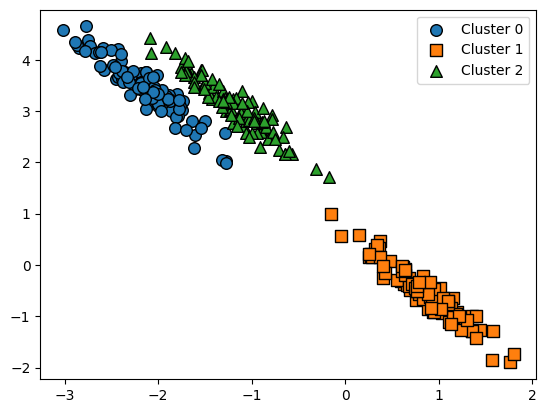

In [14]:
# 3개의 n_components 기반 GMM을 X_aniso 데이터 세트에 적용

gmm = GaussianMixture(n_components=3, random_state=0)
gmm_label = gmm.fit(X_aniso).predict(X_aniso)
clusterDF["gmm_label"] = gmm_label

# GaussianMixture는 cluster_centers_ 속성이 없으므로 iscenter를 False로 설정

visualize_cluster_plot(gmm, clusterDF, "gmm_label", iscenter=False)

- GMM은 데이터가 분포된 방향으로 정확하게 군집화됨을 알 수 있다.
- GMM은 k-means와 다르게 군집의 중심 좌표를 구할 수 없기 때문에 군집중심표현이 visualize_cluster_plot()에서 시각화되지 않는다.

In [17]:
# target값, kmeans의 label값, GMM의 label값을 비교하여 위와 같은 데이터셋에서의 군집화 효울 차이를 확인한다.
print("###KMeans Clustering###")
print(clusterDF.groupby("target")["kmeans_label"].value_counts())
print("\n### Gaussian Mixture Clustering ###")
print(clusterDF.groupby("target")["gmm_label"].value_counts())

###KMeans Clustering###
target  kmeans_label
0       2                73
        0                27
1       1               100
2       0                86
        2                14
Name: kmeans_label, dtype: int64

### Gaussian Mixture Clustering ###
target  gmm_label
0       2            100
1       1            100
2       0            100
Name: gmm_label, dtype: int64


- kmeans보다 GMM이 잘 매핑됨을 알 수 있다.
- GMM의 경우는 KMeans보다 유연하게 다양한 데이터 세트에 잘 적용될 수 있다는 장점이 있다.
- 하지만 GMM은 군집화를 위한 수행 시간이 오래 걸린다는 단점이 있음